# Klasifikasi Heart Disease


## Background

Penyakit jantung, sering disebut sebagai pembunuh nomor satu di seluruh dunia, telah menjadi epidemi global yang mendalam. Pentingnya deteksi penyakit jantung menjadi semakin nyata seiring dengan meningkatnya angka kematian dan dampak negatif yang ditimbulkannya pada kualitas hidup individu. Ini adalah masalah kesehatan yang memengaruhi jutaan orang di seluruh dunia, tidak mengenal usia, jenis kelamin, atau latar belakang.


## Goals

Tujuan dari proyek ini adalah untuk membangun model Machine Learning yang dapat memprediksi risiko penyakit jantung berdasarkan atribut medis pasien seperti usia, jenis kelamin, tekanan darah, kadar kolesterol, dan lainnya. Prediksi ini akan membantu dokter dan peneliti untuk mengidentifikasi faktor risiko yang signifikan dan mengambil langkah-langkah pencegahan yang sesuai.


By Rofik

Dataset: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

# Data Description

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

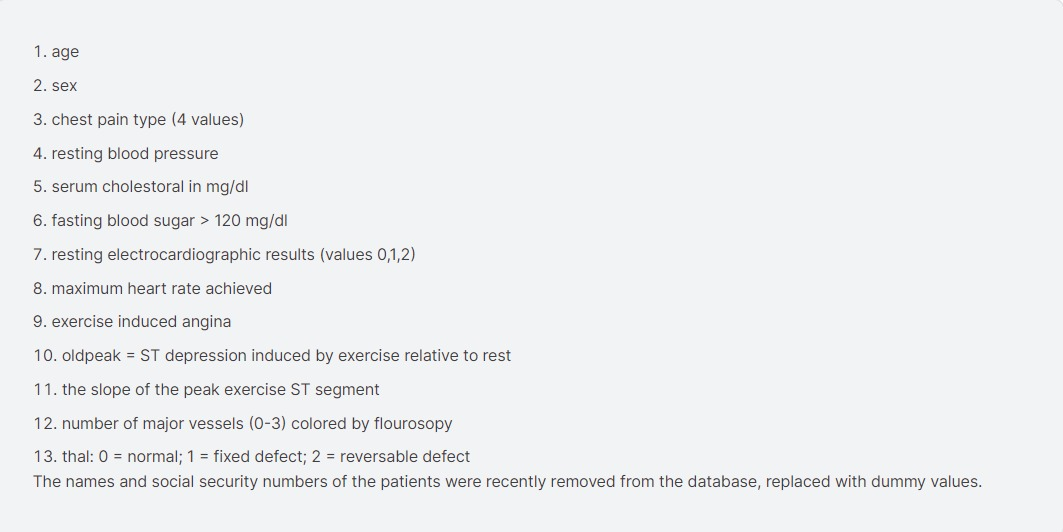

In [ ]:
#import package
import pandas as pd
import numpy as np

# Import Dataset

In [ ]:
# Baca data yang telah di-preprocess
df = pd.read_csv('/content/drive/MyDrive/DATASET/heart.csv')

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
# Melihat columns apa saja yang ada dalam  dataset
df.columns

In [ ]:
# cek jumlah row dan column
df.shape

In [ ]:
# Check informasi dataset
df.info()

In [ ]:
df1 = df.drop_duplicates(keep='first')

In [ ]:
# cek jumlah row dan column
df1.shape

In [ ]:
#statistik deskriptif
df1.describe()

In [ ]:
import IPython

url = 'https://www.biologyforlife.com/uploads/2/2/3/9/22392738/c101b0da6ea1a0dab31f80d9963b0368_orig.png'
img = IPython.display.Image(url, width = 1000)
img

# Mengecek Keseimbangan kelas

In [ ]:
class_counts = df1['target'].value_counts()
print('Jumlah Penderita Heart Disease:', class_counts[1])
print('Jumlah Orang Sehat:', class_counts[0])

Jumlah penderita Hear Disease lebih besar dibanding orang yang dalam kondisi sehat. Untuk membuat model menghasilkan perfroma baik, yang mana seimbang dalam belajar dari 2 kelas tersebut, perlu dilakukan penyeimbangan kelas.

#Penyeimbangan kelas dengan SMOTE

Cara kerja SMOTE untuk menyeimbangkan data
1. SMOTE memilih satu sampel dari kelas minoritas yang akan di-'over-sample'.

2. Kemudian, SMOTE memilih beberapa tetangga terdekat dari sampel tersebut.

3. Untuk setiap tetangga yang dipilih, SMOTE menghitung perbedaan antara fitur-fitur sampel awal dan tetangga tersebut.

4. SMOTE kemudian menghasilkan sampel sintetis dengan cara mengambil rasio perbedaan ini dan menggabungkannya dengan sampel awal. Ini menghasilkan sampel baru yang seimbang antara sampel awal dan tetangga.

5. Proses ini diulang untuk beberapa sampel dari kelas minoritas hingga jumlahnya seimbang dengan kelas mayoritas.

In [ ]:
from imblearn.over_sampling import SMOTE

# Memisahkan fitur dan target
X = df1.drop('target', axis=1)
y = df1['target']

# Menerapkan SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Menggabungkan fitur dan target kembali
df2 = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame({'target': y_resampled})], axis=1)

In [ ]:
# Melihat distribusi kelas setelah SMOTE
class_counts = df2['target'].value_counts()
print('Jumlah Penderita Heart Disease:', class_counts[1])
print('Jumlah Orang Sehat:', class_counts[0])

# Model Development 1

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Bagi data menjadi fitur (X) dan label (y)
X = df2.drop('target', axis=1)
y = df2['target']

In [ ]:
from sklearn.preprocessing import StandardScaler
# Normalisasi data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X

In [ ]:
# Bagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

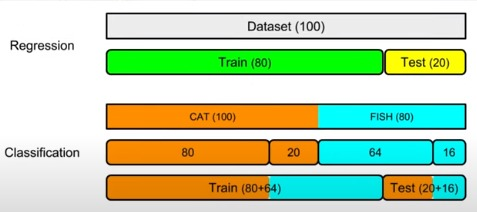

## Model XGBoost

In [ ]:
# Buat model XGBoost
xgb = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3)

# Melatih model pada data pelatihan
xgb.fit(X_train, y_train)

In [ ]:
# Lakukan prediksi pada data pengujian
ypred_xgb = xgb.predict(X_test)

In [ ]:
ypred_xgb

In [ ]:
xgb.score(X_test, y_test)

Akurasi yang didapat sekarang adalah 78.78%. Namun apabila di run ulang mungkin akurasinya akan berubah, menjadi kurang dari nilai tersebut. Karena kemungkinan akurasi ini didapat dari hasil split data, yang kebetulan data testnya mudah. Begitu juga sebaliknya. Untuk mengatasi ini, maka dilakukan cross validation.

In [ ]:
# Melakukan cross-validation dengan 5 fold
xgb_scores = cross_val_score(xgb, X, y, cv=5, scoring='accuracy')
xgb_mean_score1 = np.mean(xgb_scores)

print(f'Akurasi XGBoost (Cross-Validation): {xgb_mean_score1:.2f}')

Hasil cross validation, cenderung lebih stabil.

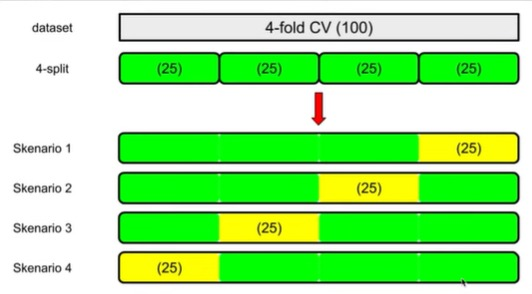

## Model Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Buat model Random Forest
rfc = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)

In [ ]:
# Melakukan cross-validation dengan 5 fold
rfc_scores = cross_val_score(rfc, X, y, cv=5, scoring='accuracy')
rfc_mean_score1 = np.mean(rfc_scores)

print(f'Akurasi Random Forest (Cross-Validation): {rfc_mean_score1:.2f}')

## Model KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Buat model K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Melakukan cross-validation dengan 5 fold
knn_scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
knn_mean_score1 = np.mean(knn_scores)


In [ ]:
print(f'Akurasi K-Nearest Neighbors (Cross-Validation): {knn_mean_score1:.2f}')

## Model Regresi Logistik

In [ ]:
from sklearn.linear_model import LogisticRegression

# Buat model Regresi Logistik
logistic_reg = LogisticRegression(max_iter=1000)

In [ ]:
# Melakukan cross-validation dengan 5 fold
logistic_reg_scores = cross_val_score(logistic_reg, X, y, cv=5, scoring='accuracy')
logistic_reg_mean_score1 = np.mean(logistic_reg_scores)

print(f'Akurasi Regresi Logistik (Cross-Validation): {logistic_reg_mean_score1:.2f}')

## Model Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

# Buat model Neural Network (MLP) untuk klasifikasi
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [ ]:
# Melakukan cross-validation dengan 5 fold
mlp_scores = cross_val_score(mlp, X, y, cv=5, scoring='accuracy')
mlp_mean_score1 = np.mean(mlp_scores)

print(f'Akurasi Neural Network (Cross-Validation): {mlp_mean_score1:.2f}')

## Model Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Buat model Decision Tree untuk klasifikasi
decision_tree = DecisionTreeClassifier(random_state=42)

In [ ]:
# Melakukan cross-validation dengan 5 fold
decision_tree_scores = cross_val_score(decision_tree, X, y, cv=5, scoring='accuracy')
decision_tree_mean_score1 = np.mean(decision_tree_scores)

print(f'Akurasi Decision Tree (Cross-Validation): {decision_tree_mean_score1:.2f}')

## Model SVM

In [ ]:
from sklearn.svm import SVC

# Buat model Support Vector Machine (SVM) untuk klasifikasi
svm_classifier = SVC(kernel='linear', C=1)

In [ ]:
# Melakukan cross-validation dengan 5 fold
svm_scores = cross_val_score(svm_classifier, X, y, cv=5, scoring='accuracy')
svm_mean_score1 = np.mean(svm_scores)

print(f'Akurasi Support Vector Machine (SVM) (Cross-Validation): {svm_mean_score1:.2f}')

# EDA

In [ ]:
import matplotlib.pyplot as plt #data viz
import seaborn as sns #data viz

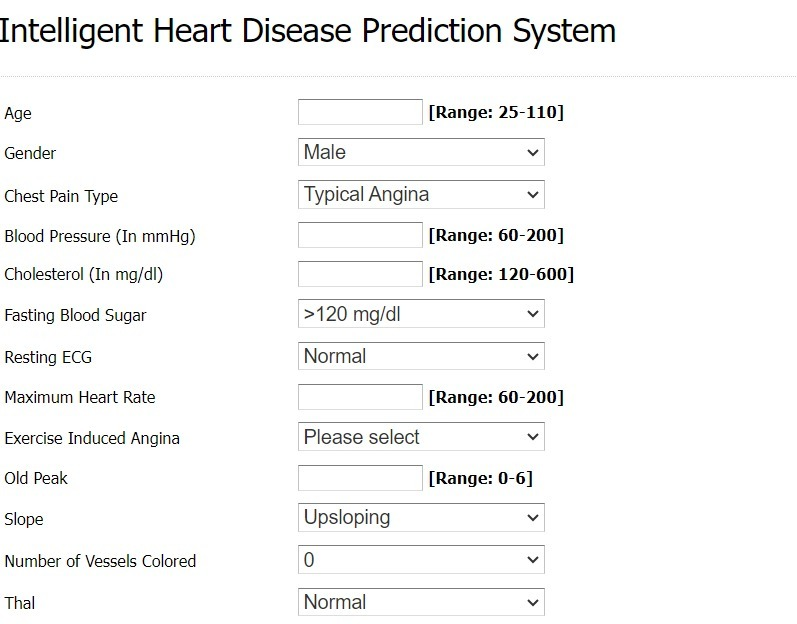

In [ ]:
# Melihat distribusi kelas sebelum SMOTE
class_counts = df1['target'].value_counts()
print('Jumlah Penderita Heart Disease:', class_counts[1])
print('Jumlah Orang Sehat:', class_counts[0])

In [ ]:
# Melihat distribusi kelas setelah SMOTE
class_counts = df2['target'].value_counts()
print('Jumlah Penderita Heart Disease:', class_counts[1])
print('Jumlah Orang Sehat:', class_counts[0])

Pengecekan outlier menggunakan df2. atau data yang sudah diseimbangkan

## Cek Outlier age

In [ ]:
#box-plot
fig = plt.figure(figsize =(10, 8))
plt.boxplot(df2['age'])
plt.show()

In [ ]:
#Find Q1 & Q3
q1 = np.percentile(df2.age, 25) #np.quantile(df.Y, 0.25)
q3 = np.percentile(df2.age, 75)

In [ ]:
# Find the IQR which is the difference between third and first quartile
iqr = q3 - q1

In [ ]:
# Find lower and upper bound
lower_bond = q1 - (1.5*iqr)
upper_bond = q3 + (1.5*iqr)

In [ ]:
# Find outliers (cari nilai < lower bond | nilai > upper_bond)
df2[(df2['age'] < lower_bond) | (df2['age'] > upper_bond)]

Tidak ada outlier di fitur age

## Cek Outlier trestbps

In [ ]:
#box-plot
fig = plt.figure(figsize =(10, 8))
plt.boxplot(df2['trestbps'])
plt.show()

In [ ]:
#Find Q1 & Q3
q1 = np.percentile(df2.trestbps, 25) #np.quantile(df.Y, 0.25)
q3 = np.percentile(df2.trestbps, 75)

In [ ]:
# Find the IQR which is the difference between third and first quartile
iqr_trestbps = q3 - q1

In [ ]:
# Find lower and upper bound
lower_bond = q1 - (1.5*iqr_trestbps)
upper_bond = q3 + (1.5*iqr_trestbps)

In [ ]:
# Find outliers (cari nilai < lower bond | nilai > upper_bond)
df2[(df2['trestbps'] < lower_bond) | (df2['trestbps'] > upper_bond)]

In [ ]:
# Temukan outlier
outliers = df2[(df2['trestbps'] < lower_bond) | (df2['trestbps'] > upper_bond)]

# Hapus baris yang mengandung outlier dari df2
df3 = df2[~((df2['trestbps'] < lower_bond) | (df2['trestbps'] > upper_bond))]

In [ ]:
df3.shape


In [ ]:
df3['target']

In [ ]:
len(df3['target'])

## Cek Outlier chol

In [ ]:
#box-plot
fig = plt.figure(figsize =(10, 8))
plt.boxplot(df3['chol'])
plt.show()

In [ ]:
#Find Q1 & Q3
q1 = np.percentile(df3.chol, 25) #np.quantile(df.Y, 0.25)
q3 = np.percentile(df3.chol, 75)

In [ ]:
# Find the IQR which is the difference between third and first quartile
iqr_chol = q3 - q1

In [ ]:
# Find lower and upper bound
lower_bond = q1 - (1.5*iqr_chol)
upper_bond = q3 + (1.5*iqr_chol)

In [ ]:
# Find outliers (cari nilai < lower bond | nilai > upper_bond)
df3[(df3['chol'] < lower_bond) | (df3['chol'] > upper_bond)]

In [ ]:
# Membuat DataFrame baru hanya dengan data yang bukan outlier
df4 = df3[(df3['chol'] >= lower_bond) & (df3['chol'] <= upper_bond)]

In [ ]:
df4

In [ ]:
len(df4['target'])

## Cek Outlier thalach

In [ ]:
#box-plot
fig = plt.figure(figsize =(10, 8))
plt.boxplot(df4['thalach'])
plt.show()

In [ ]:
#Find Q1 & Q3
q1 = np.percentile(df4.thalach, 25) #np.quantile(df.Y, 0.25)
q3 = np.percentile(df4.thalach, 75)

In [ ]:
# Find the IQR which is the difference between third and first quartile
iqr_thalach = q3 - q1

In [ ]:
# Find lower and upper bound
lower_bond = q1 - (1.5*iqr_thalach)
upper_bond = q3 + (1.5*iqr_thalach)

In [ ]:
# Find outliers (cari nilai < lower bond | nilai > upper_bond)
df4[(df4['thalach'] < lower_bond) | (df4['thalach'] > upper_bond)]

In [ ]:
#drop outlier
df5 = df4[~((df4['thalach'] < lower_bond) | (df4['thalach'] > upper_bond))]

In [ ]:
# check kolom x baris setelah outlier di drop
df5.shape

In [ ]:
len(df5['target'])

## Cek Outlier oldpeak

In [ ]:
#box-plot
fig = plt.figure(figsize =(10, 8))
plt.boxplot(df5['oldpeak'])
plt.show()

In [ ]:
#Find Q1 & Q3
q1 = np.percentile(df5.oldpeak, 25) #np.quantile(df.Y, 0.25)
q3 = np.percentile(df5.oldpeak, 75)

In [ ]:
# Find the IQR which is the difference between third and first quartile
iqr_oldpeak = q3 - q1

In [ ]:
# Find lower and upper bound
lower_bond = q1 - (1.5*iqr_oldpeak)
upper_bond = q3 + (1.5*iqr_oldpeak)

In [ ]:
# Find outliers (cari nilai < lower bond | nilai > upper_bond)
df5[(df5['oldpeak'] < lower_bond) | (df5['oldpeak'] > upper_bond)]

In [ ]:
#drop outlier
df6 = df5[~((df5['oldpeak'] < lower_bond) | (df5['oldpeak'] > upper_bond))]

In [ ]:
# check kolom x baris setelah outlier di drop
df6.shape

In [ ]:
len(df6['target'])


In [ ]:
#Heatmap Correlation
import seaborn as sns

corr = df6.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap="RdYlGn", vmin=-1, vmax=1, center=0, cbar=True, annot =True,
            square=True, linewidths=.7, annot_kws={"size": 13})
plt.xticks(rotation=90, fontsize=15)
plt.title('Heatmap Correlation', fontsize=22)
plt.yticks(fontsize=15)

Berdasrkan correlation test, dapat diketahui bahwa ada hubungan positif antara cp (0.45), restecg (0.19), thalach (0.45), slope (0.36).

Korelasi yang paling kuat:
- positif dengan target cp, thalach, slope
- negatif dengan target exang, oldpeak, ca, thal




##Visualisasi Data

In [ ]:
df6.info()

In [ ]:
sns.histplot(data=df6, x='age', hue='target', multiple='stack')

In [ ]:
sns.histplot(data=df6, x='sex', hue='target', multiple='stack')

In [ ]:
sns.histplot(data=df6, x='cp', hue='target', multiple='stack')

In [ ]:
sns.histplot(data=df6, x='trestbps', hue='target', multiple='stack')

In [ ]:
sns.histplot(data=df6, x='chol', hue='target', multiple='stack')

In [ ]:
sns.histplot(data=df6, x='fbs', hue='target', multiple='stack')

In [ ]:
sns.histplot(data=df6, x='restecg', hue='target', multiple='stack')

In [ ]:
sns.histplot(data=df6, x='thalach', hue='target', multiple='stack')

In [ ]:
sns.histplot(data=df6, x='exang', hue='target', multiple='stack')

In [ ]:
sns.histplot(data=df6, x='oldpeak', hue='target', multiple='stack')

In [ ]:
sns.histplot(data=df6, x='slope', hue='target', multiple='stack')

In [ ]:
sns.histplot(data=df6, x='ca', hue='target', multiple='stack')

In [ ]:
sns.histplot(data=df6, x='thal', hue='target', multiple='stack')

# Model Development 2

In [ ]:
# Bagi data menjadi fitur (X) dan label (y)
X_2 = df6.drop('target', axis=1)
y_2 = df6['target']

In [ ]:
# Melihat jumlah data di X_2
num_samples_X_2, num_features_X_2 = X_2.shape
print(f"Jumlah sampel di X_2: {num_samples_X_2}")

# Melihat jumlah data di y_2
num_samples_y_2 = y_2.shape[0]  # Karena y_2 adalah Series, kita hanya perlu menghitung jumlah barisnya
print(f"Jumlah sampel di y_2: {num_samples_y_2}")


In [ ]:
from sklearn.preprocessing import StandardScaler
# Normalisasi data
scaler = StandardScaler()
X_2 = scaler.fit_transform(X)

In [ ]:
y_2

## XGBoost

In [ ]:
# Buat model XGBoost
xgb2 = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3)

In [ ]:
# Bagi data menjadi fitur (X) dan label (y)
X_2 = df6.drop('target', axis=1)
y_2 = df6['target']

# Buat model XGBoost
xgb2 = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3)

# Melakukan cross-validation dengan 5 fold menggunakan xgb2
xgb2_scores = cross_val_score(xgb2, X_2, y_2, cv=5, scoring='accuracy')
xgb2_mean_score2 = xgb2_scores.mean()

print(f'Akurasi XGBoost (Cross-Validation) pada dataset df6: {xgb2_mean_score2:.2f}')


## Random Forest

In [ ]:
# Buat model Random Forest
rfc = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)

In [ ]:
# Melakukan cross-validation dengan 5 fold
rfc_scores = cross_val_score(rfc, X_2, y_2, cv=5, scoring='accuracy')
rfc_mean_score2 = rfc_scores.mean()

print(f'Akurasi Random Forest (Cross-Validation) pada dataset df6: {rfc_mean_score2:.2f}')

## KNN

In [ ]:
# Buat model K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Melakukan cross-validation dengan 5 fold
knn_scores = cross_val_score(knn, X_2, y_2, cv=5, scoring='accuracy')
knn_mean_score2 = knn_scores.mean()

print(f'Akurasi K-Nearest Neighbors (KNN) (Cross-Validation) pada dataset df6: {knn_mean_score2:.2f}')

## Regresi Logistik

In [ ]:
# Buat model Regresi Logistik
logistic_regression = LogisticRegression()

In [ ]:
# Melakukan cross-validation dengan 5 fold
logistic_scores = cross_val_score(logistic_regression, X_2, y_2, cv=5, scoring='accuracy')
logistic_mean_score2 = logistic_scores.mean()

print(f'Akurasi Regresi Logistik (Cross-Validation) pada dataset df6: {logistic_mean_score2:.2f}')

Akurasi Regresi Logistik (Cross-Validation) pada dataset df6: 0.85


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

## Neural Network

In [ ]:
# Buat model Jaringan Saraf (Neural Network)
nn_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)

In [ ]:
# Melakukan cross-validation dengan 5 fold
nn_scores = cross_val_score(nn_classifier, X_2, y_2, cv=5, scoring='accuracy')
nn_mean_score2 = nn_scores.mean()

print(f'Akurasi Jaringan Saraf (Neural Network) (Cross-Validation) pada dataset df6: {nn_mean_score2:.2f}')

Akurasi Jaringan Saraf (Neural Network) (Cross-Validation) pada dataset df6: 0.71


## Decision Tree

In [ ]:
# Buat model Decision Tree
dt_classifier = DecisionTreeClassifier(max_depth=3)

In [ ]:
# Melakukan cross-validation dengan 5 fold
dt_scores = cross_val_score(dt_classifier, X_2, y_2, cv=5, scoring='accuracy')
dt_mean_score2 = dt_scores.mean()

print(f'Akurasi Decision Tree (Cross-Validation) pada dataset df6: {dt_mean_score2:.2f}')

Akurasi Decision Tree (Cross-Validation) pada dataset df6: 0.84


## SVM

In [ ]:
# Buat model Support Vector Machine (SVM) untuk klasifikasi
svm_classifier = SVC(kernel='linear', C=1)

In [ ]:
# Melakukan cross-validation dengan 5 fold
svm_scores = cross_val_score(svm_classifier, X_2, y_2, cv=5, scoring='accuracy')
svm_mean_score2 = svm_scores.mean()

print(f'Akurasi Support Vector Machine (SVM) (Cross-Validation) pada dataset df6: {svm_mean_score2:.2f}')

Akurasi Support Vector Machine (SVM) (Cross-Validation) pada dataset df6: 0.83


# Seleksi Fitur

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Buat model Random Forest
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_2, y_2)

RandomForestClassifier(random_state=42)

In [ ]:
# Mendapatkan feature importance dari model Random Forest
feature_importances = rfc.feature_importances_

# Menggabungkan nama fitur dan feature importance
feature_importance_dict = dict(zip(X_2.columns, feature_importances))

In [ ]:
# Menyortir fitur berdasarkan feature importance (dari yang paling besar)
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Tampilkan hasil seleksi fitur
for feature, importance in sorted_feature_importance:
    print(f'Fitur: {feature}, Feature Importance: {importance:.4f}')

Fitur: cp, Feature Importance: 0.1514
Fitur: thalach, Feature Importance: 0.1376
Fitur: oldpeak, Feature Importance: 0.1262
Fitur: ca, Feature Importance: 0.1018
Fitur: age, Feature Importance: 0.0924
Fitur: thal, Feature Importance: 0.0913
Fitur: chol, Feature Importance: 0.0749
Fitur: trestbps, Feature Importance: 0.0733
Fitur: slope, Feature Importance: 0.0560
Fitur: exang, Feature Importance: 0.0329
Fitur: sex, Feature Importance: 0.0302
Fitur: restecg, Feature Importance: 0.0211
Fitur: fbs, Feature Importance: 0.0107


Dari hasil seleksi fitur menggunakan random forest regsessor. Terdapat 5 fitur yang paling berkolerasi dengan target. Yaitu fitur ke cp (0.1514), fitur thalach (0.1376), fitur oldpeak (0.1262), fitur ca (0.1018), fitur age (0.0924)

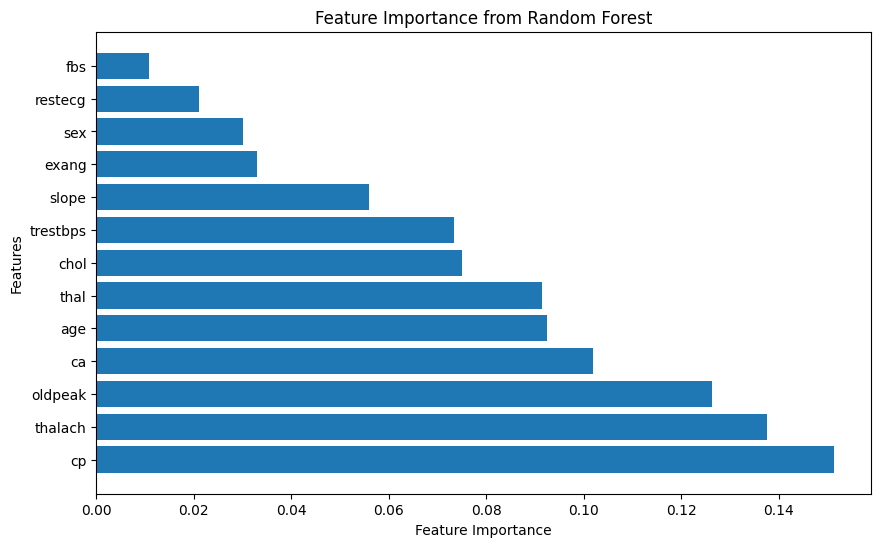

In [ ]:
import matplotlib.pyplot as plt


feature_names = X_2.columns

# Membuat grafik bar untuk feature importance
plt.figure(figsize=(10, 6))
sorted_feature_importance = sorted(zip(feature_names, feature_importances), key=lambda x: x[1])
features, importances = zip(*sorted_feature_importance)
plt.barh(features, importances, align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')

plt.gca().invert_yaxis()

plt.show()

# Model Development 3

In [ ]:
# Mengambil hanya 5 fitur teratas berdasarkan importance
selected_features = pd.Series(feature_importances, index=feature_names).nlargest(6).index

In [ ]:
# Membuat DataFrame baru hanya dengan fitur-fitur terpilih
X_selected = X_2[selected_features]

In [ ]:
X_selected

,cp,thalach,oldpeak,ca,age,thal
0,0,168,1.000000,2,52,3
1,0,155,3.100000,0,53,3
2,0,125,2.600000,0,70,3
3,0,161,0.000000,1,61,3
4,0,106,1.900000,3,62,2
...,...,...,...,...,...,...
323,0,126,1.007439,0,51,2
324,0,172,1.473693,0,53,3
325,0,154,1.760610,1,60,3
326,1,133,2.224408,1,59,1


## FS+XGBoost

In [ ]:
# Gantilah X dan y dengan dataset df6 yang sesuai
X_3 = X_selected
y_3 = y_2

In [ ]:
y_3

0      0
1      0
2      0
3      0
4      0
      ..
323    0
324    0
325    0
326    0
327    0
Name: target, Length: 308, dtype: int64

In [ ]:
# Buat model XGBoost
xgb = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3)

In [ ]:
# Melakukan cross-validation dengan 5 fold
xgb_scores = cross_val_score(xgb, X_3, y_3, cv=5, scoring='accuracy')
xgb_mean_score3 = xgb_scores.mean()

print(f'Akurasi XGBoost (Cross-Validation) + FS : {xgb_mean_score3:.2f}')

Akurasi XGBoost (Cross-Validation) + FS : 0.82


## FS+RF

In [ ]:
# Buat model Random Forest
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Melakukan cross-validation dengan 5 fold
rfc_scores = cross_val_score(rfc, X_3, y_3, cv=5, scoring='accuracy')
rfc_mean_score3 = rfc_scores.mean()

print(f'Akurasi Random Forest (Cross-Validation) + FS : {rfc_mean_score3:.2f}')

Akurasi Random Forest (Cross-Validation) + FS : 0.81


## FS+KNN

In [ ]:
# Buat model K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Melakukan cross-validation dengan 5 fold
knn_scores = cross_val_score(knn, X_3, y_3, cv=5, scoring='accuracy')
knn_mean_score3 = knn_scores.mean()

print(f'Akurasi K-Nearest Neighbors (Cross-Validation) + FS: {knn_mean_score3:.2f}')

Akurasi K-Nearest Neighbors (Cross-Validation) + FS: 0.73


## FS+LR

In [ ]:
# Buat model Regresi Logistik
logistic_regression = LogisticRegression(solver='liblinear', random_state=42)

In [ ]:
# Melakukan cross-validation dengan 5 fold
logistic_scores = cross_val_score(logistic_regression, X_3, y_3, cv=5, scoring='accuracy')
logistic_mean_score3 = logistic_scores.mean()

print(f'Akurasi Regresi Logistik (Cross-Validation) + FS: {logistic_mean_score3:.2f}')

Akurasi Regresi Logistik (Cross-Validation) + FS: 0.85


## FS+NN

In [ ]:
# Buat model Neural Network
nn_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [ ]:
# Melakukan cross-validation dengan 5 fold
nn_scores = cross_val_score(nn_classifier, X_3, y_3, cv=5, scoring='accuracy')
nn_mean_score3 = nn_scores.mean()

print(f'Akurasi Neural Network (Cross-Validation) + FS: {nn_mean_score3:.2f}')

Akurasi Neural Network (Cross-Validation) + FS: 0.81


## FS+DT

In [ ]:
# Buat model Pohon Keputusan
decision_tree = DecisionTreeClassifier(random_state=42)

In [ ]:
# Melakukan cross-validation dengan 5 fold
decision_tree_scores = cross_val_score(decision_tree, X_3, y_3, cv=5, scoring='accuracy')
decision_tree_mean_score3 = decision_tree_scores.mean()

print(f'Akurasi Pohon Keputusan (Cross-Validation) + FS: {decision_tree_mean_score3:.2f}')

Akurasi Pohon Keputusan (Cross-Validation) + FS: 0.78


## FS+SVM

In [ ]:
# Buat model Support Vector Machine (SVM) untuk klasifikasi
svm_classifier = SVC(kernel='linear', C=1)

In [ ]:
# Melakukan cross-validation dengan 5 fold
svm_scores = cross_val_score(svm_classifier, X_3, y_3, cv=5, scoring='accuracy')
svm_mean_score3 = svm_scores.mean()

print(f'Akurasi Support Vector Machine (SVM) (Cross-Validation) + FS : {svm_mean_score3:.2f}')

Akurasi Support Vector Machine (SVM) (Cross-Validation) + FS : 0.84


# Perbandingan performa antar model algoritma

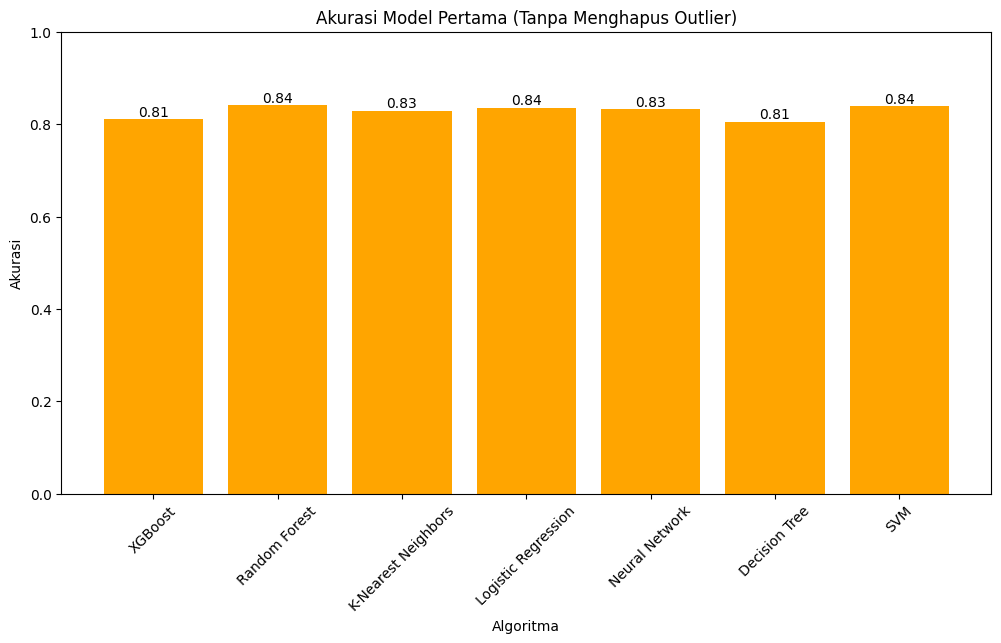

In [ ]:
import matplotlib.pyplot as plt

# Algoritma
algorithms = ['XGBoost', 'Random Forest', 'K-Nearest Neighbors', 'Logistic Regression', 'Neural Network', 'Decision Tree', 'SVM']

# Akurasi Model Pertama (Tanpa Menghapus Outlier)
model1_scores = [xgb_mean_score1, rfc_mean_score1, knn_mean_score1, logistic_reg_mean_score1, mlp_mean_score1, decision_tree_mean_score1, svm_mean_score1]

plt.figure(figsize=(12, 6))
bars = plt.bar(algorithms, model1_scores, color='orange')
plt.xlabel('Algoritma')
plt.ylabel('Akurasi')
plt.title('Akurasi Model Pertama (Tanpa Menghapus Outlier)')
plt.xticks(rotation=45)
plt.ylim(0.0, 1.0)

# Menambahkan label angka pada ujung batang
for bar, score in zip(bars, model1_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, score, f'{score:.2f}', ha='center', va='bottom')

plt.show()


Pada pemodelan yang pertama yang tidak menghapus outlier dan menggunakan seleksi fitur, diperoleh bahwa algoritma logistic regression dan SVM mampu memberi akurasi terbesar dibanding algoritma lainnya yaitu 84%. Sedangkan KNN dan Neural Network berhasil memperoleh akurasi 83%. Akurasi yang didapat dari pemodelan pertama ini cukup bagik, yang mana setiap algoritma mampu menghasilkan akurasi antara 81-84%.

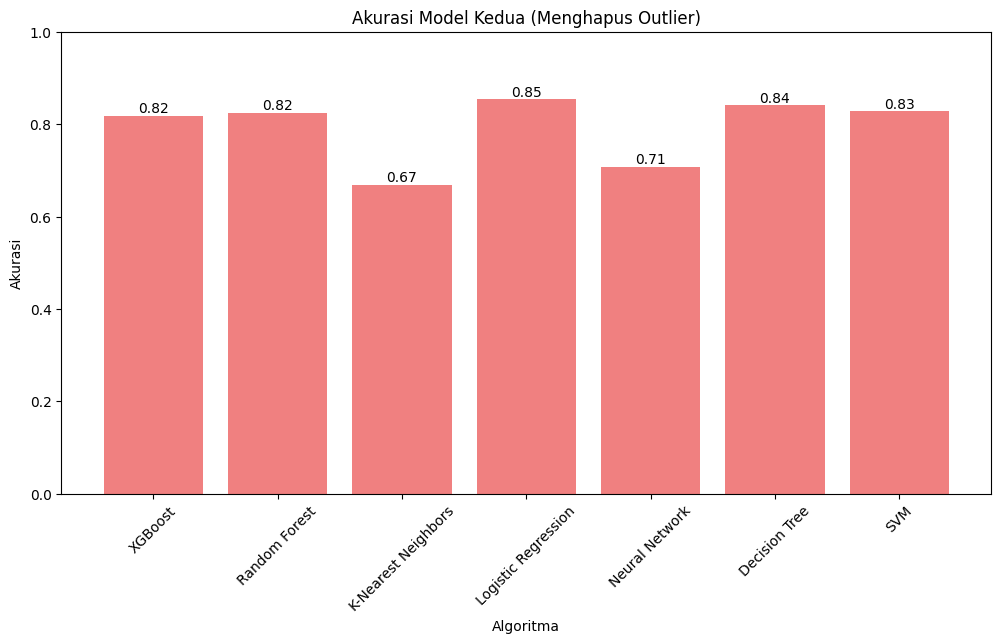

In [ ]:
import matplotlib.pyplot as plt

# Algoritma
algorithms = ['XGBoost', 'Random Forest', 'K-Nearest Neighbors', 'Logistic Regression', 'Neural Network', 'Decision Tree', 'SVM']

# Akurasi Model Kedua (Menghapus Outlier)
model2_scores = [xgb2_mean_score2, rfc_mean_score2, knn_mean_score2, logistic_mean_score2, nn_mean_score2, dt_mean_score2, svm_mean_score2]

plt.figure(figsize=(12, 6))
bars = plt.bar(algorithms, model2_scores, color='lightcoral')
plt.xlabel('Algoritma')
plt.ylabel('Akurasi')
plt.title('Akurasi Model Kedua (Menghapus Outlier)')
plt.xticks(rotation=45)
plt.ylim(0.0, 1.0)

# Menambahkan label angka pada ujung batang
for bar, score in zip(bars, model2_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, score, f'{score:.2f}', ha='center', va='bottom')

plt.show()


Pemodalan kedua, menggunakan dataset, yang sebelumnya data outliernya dihapus terlebih dahulu. Yaitu menggunakan 308 record data. Meskipun akurasi yang dihasilkan dari KNN adalah 67% dan Neural Network 76%, pemodelan kedua ini berhasil memperoleh akurasi lebih besar dibanding pemodelan pertama. Yang mana algoritma Logistic Regression memperoleh akurasi sebesar 85%, dan Decision Tree sebesar 84%. Meskipun data yang dilatih cenderung lebih kecil dibanding pemodelan pertama, namuan di algoritma LR dan DT memberi performa yang bagus.

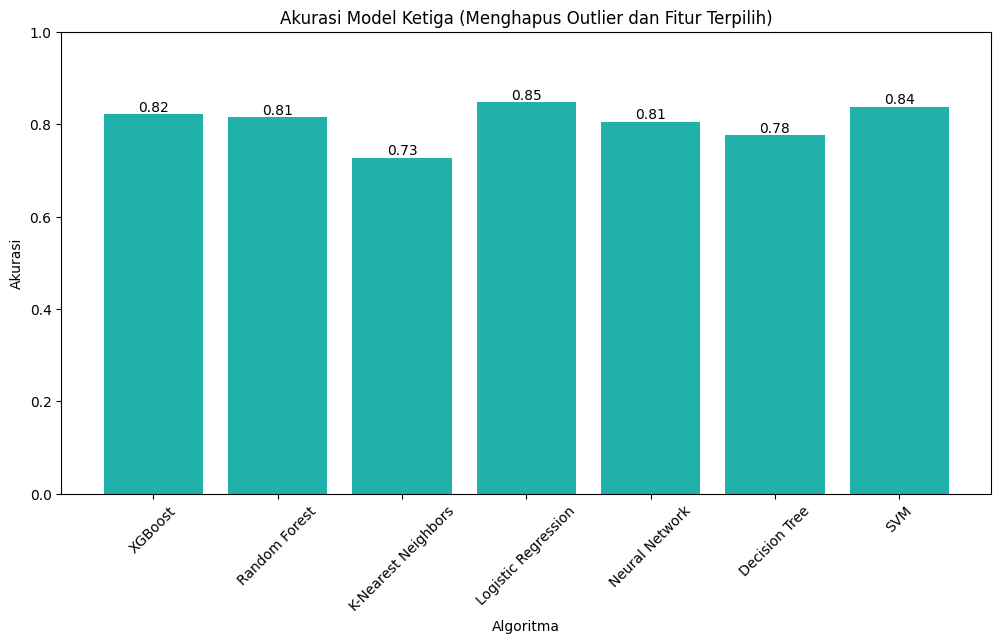

In [ ]:
import matplotlib.pyplot as plt

# Algoritma
algorithms = ['XGBoost', 'Random Forest', 'K-Nearest Neighbors', 'Logistic Regression', 'Neural Network', 'Decision Tree', 'SVM']

# Akurasi Model Ketiga (Menghapus Outlier dan Fitur Terpilih)
model3_scores = [xgb_mean_score3, rfc_mean_score3, knn_mean_score3, logistic_mean_score3, nn_mean_score3, decision_tree_mean_score3, svm_mean_score3]

plt.figure(figsize=(12, 6))
bars = plt.bar(algorithms, model3_scores, color='lightseagreen')
plt.xlabel('Algoritma')
plt.ylabel('Akurasi')
plt.title('Akurasi Model Ketiga (Menghapus Outlier dan Fitur Terpilih)')
plt.xticks(rotation=45)
plt.ylim(0.0, 1.0)

# Menambahkan label angka pada ujung batang
for bar, score in zip(bars, model3_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, score, f'{score:.2f}', ha='center', va='bottom')

plt.show()


Pemodelan ketiga menggunakan data yang outliernya telah dihapus, dan hanya menggunakan 6 fitur saja. Yang mana fitur-fitur tersebut diperoleh dari Feature selection menggunakan Feature Importance. Namun meskipun demikian, dengan menggunakan data yang lebih minim dibanding pemodelan 1 dan 2, Logistic Regression tetap memberikan akurasi yang tinggi, sebesar 85%. Begitu juga SVM yang memperoleh akurasi yang cukup tinggi pula yaitu 84%. Namun akurasi terkecil yang diperoleh sebesar 73% dan 75%, dari algoritma KNN dan DT.

# Conclusion



*   Tiap algoritma memiliki cara kerja, kelebihan dan kekurangan sendiri terutama dalam menjalankan tugasnya.
*   Teknik penyeimbangan data menggunakan SMOTE merupakan metode yang bagus dan tepat
*   Begitu juga dengan pilihan menggunakan Standardscaler untuk Standarisasi data.
*   Algoritma Logistic Regression dan SVM cenderung menunjukkan performa yang bagus dalam tiap model.
*   Tiap metode yang diterapkan dalam 3 model, menunjukkan pengaruh yang cukup signifikan. Model ketiga yang dilakukan penghapusan outlier dan seleksi fitur memberikan prforma yang optimal. Bahkan sama dengan pemodelan kedua yang belum menerapkan feature selection. Yaitu pada algoritma Logistic Regression akurasi sebesar 85%. Apabila perfromanya sama, maka mungkin bisa dipilih pemodelan ketiga, menggunakan feature selection, karena fiturnya lebih sedikit tentunya daya dan waktu yang lebih dibutuhkan juga lebih sedikit.
*   Akurasi terbesar diperoleh adalah 85%, apabila diinginkan mendapat akurasi yang lebih besar, mungkin selanjutnya bisa dicoba menggunakan algoritma lain yang lebih powerfull, atau mencoba membangun model stacking ensemble learning, vooting, baging atau lainnya. Hyperparameter Tunning juga mungkin bisa dilakukan untuk memaksimalkan akurasi, dengan menggunakan parameter yang tepat di algoritmanya. Atau juga menggunakan metode Feature Selection lainnya.








# Recommendation
Akurasi terbesar diperoleh adalah 85%, apabila diinginkan mendapat akurasi yang lebih besar, mungkin selanjutnya bisa dicoba menggunakan algoritma lain yang lebih powerfull, atau mencoba membangun model stacking ensemble learning, vooting, baging atau lainnya. Hyperparameter Tunning juga mungkin bisa dilakukan untuk memaksimalkan akurasi, dengan menggunakan parameter yang tepat di algoritmanya. Atau juga menggunakan metode Feature Selection lainnya.